In [1]:
data <- read.csv('C:/Users/karen/Documents/STA141A/mxmh_survey_results.csv')

In [2]:
head(data)

,Timestamp,Age,Primary.streaming.service,Hours.per.day,While.working,Instrumentalist,Composer,Fav.genre,Exploratory,Foreign.languages,⋯,Frequency..R.B.,Frequency..Rap.,Frequency..Rock.,Frequency..Video.game.music.,Anxiety,Depression,Insomnia,OCD,Music.effects,Permissions
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,,I understand.
2,8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,,I understand.
3,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.
4,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Never,Never,Never,9,7,3,3,Improve,I understand.
5,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.
6,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.


In [3]:
is.data.frame(data)

[1] TRUE

In [5]:
require('tidyr')
require('dplyr')
require('ggplot2')

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [7]:
# mark people as anxious (1) if anxiety > 5, not anxious (0) otherwise
data$Anxious = ifelse(data$Anxiety > 5, 1, 0)
head(data)

,Timestamp,Age,Primary.streaming.service,Hours.per.day,While.working,Instrumentalist,Composer,Fav.genre,Exploratory,Foreign.languages,⋯,Frequency..Rap.,Frequency..Rock.,Frequency..Video.game.music.,Anxiety,Depression,Insomnia,OCD,Music.effects,Permissions,Anxious
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,8/27/2022 19:29:02,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Very frequently,Never,Sometimes,3,0,1,0,,I understand.,0
2,8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Rarely,Very frequently,Rarely,7,2,2,1,,I understand.,1
3,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.,1
4,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Never,Never,Never,9,7,3,3,Improve,I understand.,1
5,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.,1
6,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.,1


In [15]:
sum(data$Music.effects == 'Improve')


[1] 542

In [12]:
nrow(data)

[1] 736

In [16]:
ratio <- sum(data$Music.effects == 'Improve') / sum(data$Anxious == 1)

In [17]:
ratio

[1] 1.220721

In [19]:
ratio2 <- sum(data$Music.effects == 'Improve') / sum(data$Anxious == 0)
ratio2

[1] 1.856164

In [21]:
data %>%
  group_by(Anxious) %>%
  summarise(ratio1 <- sum(data$Music.effects == 'Improve') / sum(data$Anxious == 1), 
           ratio2 <- sum(data$Music.effects == 'Improve') / sum(data$Anxious == 0))

Anxious,... <- NULL
<dbl>,<dbl>
0,1.856164
1,1.856164


In [22]:
# can investigate improvement in people who are not anxious + together if have room in paper
# i.e. with ratio 2 + not sure how to do together lol
#split data frame based on particular column value
data_anxious <- data[data$Anxious == 1, ]
data_not_anxious <- data[data$Anxious == 0, ]

In [23]:
head(data_anxious)

,Timestamp,Age,Primary.streaming.service,Hours.per.day,While.working,Instrumentalist,Composer,Fav.genre,Exploratory,Foreign.languages,⋯,Frequency..Rap.,Frequency..Rock.,Frequency..Video.game.music.,Anxiety,Depression,Insomnia,OCD,Music.effects,Permissions,Anxious
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
2,8/27/2022 19:57:31,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Rarely,Very frequently,Rarely,7,2,2,1,,I understand.,1
3,8/27/2022 21:28:18,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Rarely,Rarely,Very frequently,7,7,10,2,No effect,I understand.,1
4,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Never,Never,Never,9,7,3,3,Improve,I understand.,1
5,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Very frequently,Never,Rarely,7,2,5,9,Improve,I understand.,1
6,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Never,8,8,7,7,Improve,I understand.,1
11,8/27/2022 22:51:15,18,Spotify,3.0,Yes,Yes,No,Country,Yes,No,⋯,Never,Rarely,Never,7,7,4,7,No effect,I understand.,1


In [68]:
# CORRECT ratio1
ratio1 <- sum(data_anxious$Music.effects == 'Improve') / sum(data$Anxious == 1)
ratio1

[1] 0.7815315

In [44]:
rel_freq_genre = table(data_anxious$Fav.genre)/length(data_anxious$Fav.genre)
rel_freq_genre


       Classical          Country              EDM             Folk 
     0.060810811      0.031531532      0.045045045      0.051801802 
          Gospel          Hip hop             Jazz            K pop 
     0.006756757      0.051801802      0.029279279      0.036036036 
           Latin             Lofi            Metal              Pop 
     0.002252252      0.015765766      0.112612613      0.171171171 
             R&B              Rap             Rock Video game music 
     0.036036036      0.022522523      0.272522523      0.054054054 

In [32]:
sort(rel_freq_genre)


           Latin           Gospel             Lofi              Rap 
     0.002252252      0.006756757      0.015765766      0.022522523 
            Jazz          Country            K pop              R&B 
     0.029279279      0.031531532      0.036036036      0.036036036 
             EDM             Folk          Hip hop Video game music 
     0.045045045      0.051801802      0.051801802      0.054054054 
       Classical            Metal              Pop             Rock 
     0.060810811      0.112612613      0.171171171      0.272522523 

In [65]:
dimnames(sort(rel_freq_genre))

[[1]]
 [1] "Latin"            "Gospel"           "Lofi"             "Rap"             
 [5] "Jazz"             "Country"          "K pop"            "R&B"             
 [9] "EDM"              "Folk"             "Hip hop"          "Video game music"
[13] "Classical"        "Metal"            "Pop"              "Rock"

In [64]:
test <- as.vector(sort(rel_freq_genre))
test

[1] 0.002252252 0.006756757 0.015765766 0.022522523 0.029279279 0.031531532
 [7] 0.036036036 0.036036036 0.045045045 0.051801802 0.051801802 0.054054054
[13] 0.060810811 0.112612613 0.171171171 0.272522523

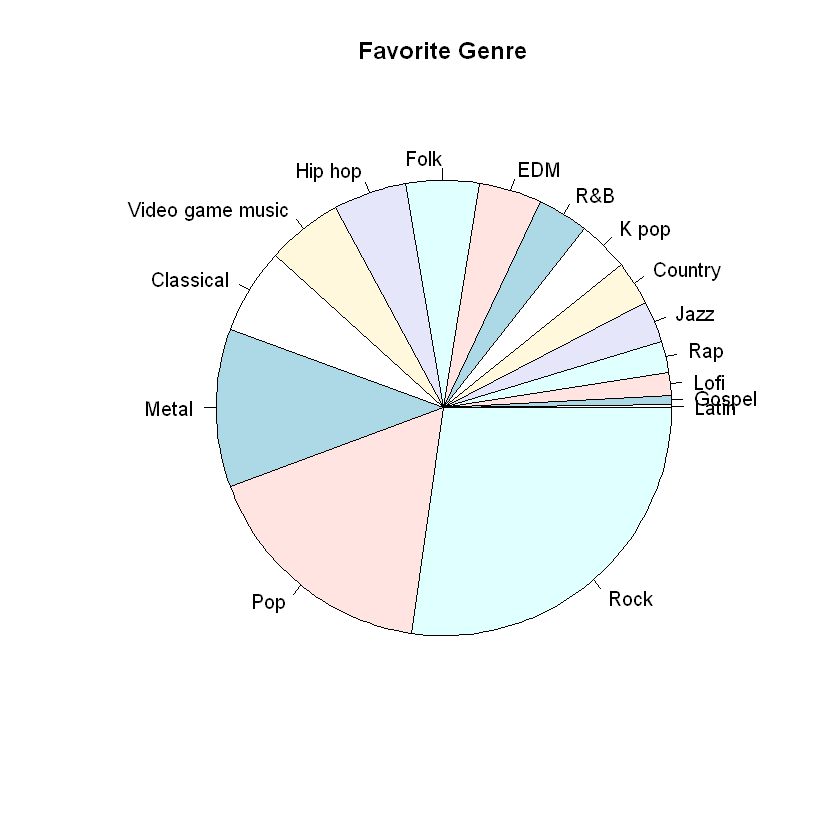

In [67]:
# Simple Pie Chart
slices <- as.vector(sort(rel_freq_genre))
#set labels as genre name
lbls <- c('Latin', 'Gospel', 'Lofi', 'Rap',
          'Jazz', 'Country', 'K pop', 'R&B', 
          'EDM', 'Folk', 'Hip hop', 'Video game music',
          'Classical', 'Metal', 'Pop', 'Rock')
pie(slices, labels = lbls, main="Favorite Genre")

In [69]:
# only attaching data for anxious people for now
#(will later detach for not anxious people data if needed)
attach(data_anxious)
lm(ratio1 ~ Video game music + Classical + Metal + Pop + Rock)

ERROR: Error in parse(text = x, srcfile = src): <text>:4:19: unexpected symbol
3: attach(data_anxious)
4: lm(ratio1 ~ Video game
                     ^
